**ATTEMPT 1**

**Imports**

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_data = pd.read_csv('Predict_Train.csv')
test_data = pd.read_csv('Predict_Test.csv')
riders_data = pd.read_csv('Predict_Riders.csv')

X_train = train_data['Distance (KM)'].values
y_train = train_data['Time from Pickup to Arrival'].values
#Should have used .iloc 

 **Need to predict Time from Pickup to Arrival !!**


In [14]:
train_data[["Placement - Time", "Arrival at Destination - Time", "Time from Pickup to Arrival","Distance (KM)"]].head()

,Placement - Time,Arrival at Destination - Time,Time from Pickup to Arrival,Distance (KM)
0,9:35:46 AM,10:39:55 AM,745,4
1,11:16:16 AM,12:17:22 PM,1993,16
2,12:39:25 PM,1:00:38 PM,455,3
3,9:25:34 AM,10:05:27 AM,1341,9
4,9:55:18 AM,10:25:37 AM,1214,9


**Reshape, to a 2d array**

In [30]:
X_train = X_train.reshape(len(X_train), 1)
print(X_train)

[[ 4]
 [16]
 [ 3]
 ...
 [20]
 [13]
 [12]]


In [27]:
y_train = y_train.reshape(len(y_train), 1)
print(y_train)

[[ 745]
 [1993]
 [ 455]
 ...
 [2953]
 [1380]
 [2128]]


**FEATURE SCALING**

In [39]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)
print(X_train)
print(y_train)

[[-0.97137039]
 [ 1.14546888]
 [-1.14777366]
 ...
 [ 1.85108197]
 [ 0.61625906]
 [ 0.43985579]]
[[-0.82240871]
 [ 0.44171198]
 [-1.11615471]
 ...
 [ 1.41411252]
 [-0.17920627]
 [ 0.57845581]]


**Training SVR model**

In [40]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

**Prediction didn't seem to work, ATTEMPT 2 FOLLOWING**

In [41]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[4]])))

array([1.91238067])

**Scatter plot seems to be useless**

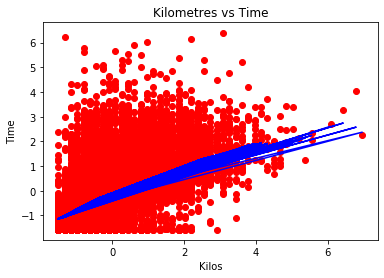

In [42]:
plt.scatter(sc_X.inverse_transform(X_train), sc_y.inverse_transform(y_train), color='red')
plt.plot(sc_X.inverse_transform(X_train), sc_y.inverse_transform(regressor.predict(X_train)), color='blue')
plt.title('Kilometres vs Time')
plt.xlabel('Kilos')
plt.ylabel('Time')
plt.show()

In [13]:
train_data

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214
5,Order_No_7408,User_Id_1342,Bike,3,Business,14,5,3:07:35 PM,14,5,...,4:23:41 PM,9,27.2,NaN,-1.302583,36.767081,-1.257309,36.806008,Rider_Id_124,3191
6,Order_No_22680,User_Id_2803,Bike,3,Business,9,5,9:33:45 AM,9,5,...,10:19:45 AM,5,20.3,NaN,-1.279395,36.825364,-1.276574,36.851365,Rider_Id_114,1380
7,Order_No_21578,User_Id_1075,Bike,3,Business,11,1,2:13:01 PM,11,1,...,2:33:26 PM,3,28.7,NaN,-1.252796,36.800313,-1.255189,36.782203,Rider_Id_913,646
8,Order_No_5234,User_Id_733,Bike,3,Business,30,2,11:10:44 AM,30,2,...,1:19:35 PM,9,NaN,NaN,-1.255189,36.782203,-1.300255,36.825657,Rider_Id_394,3398
9,Order_No_1768,User_Id_2112,Bike,3,Business,23,5,4:48:54 PM,23,5,...,6:31:57 PM,14,24.6,NaN,-1.225322,36.808550,-1.215601,36.891686,Rider_Id_660,3439


_____________________
**ATTEMPT 2**

**STILL TRAINED A SVR MODEL, BUT TRIED A DIFFERENT APPROACH**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**NO NEED TO RESHAPE, ALREADY IN 2D ARRAY (.iloc)**

In [10]:
train_data = pd.read_csv('Predict_Train.csv')
X = train_data.iloc[: , 20:-8].values
y = train_data.iloc[: , 28:].values
print(X)

[[ 4]
 [16]
 [ 3]
 ...
 [20]
 [13]
 [12]]


**FEATURE SCALING**

In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [12]:
print(y)

[[-0.82240871]
 [ 0.44171198]
 [-1.11615471]
 ...
 [ 1.41411252]
 [-0.17920627]
 [ 0.57845581]]


**TRAINING SVR AGAIN**

In [13]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

**PREDICTION IS MORE ACCURATE**

In [22]:
#I predicted Time from pickup to arrival, when Distance (KM) is 16Km..
preds = sc_y.inverse_transform(regressor.predict(sc_X.transform([[16]])))
preds

array([2080.680562])

In [24]:
train_data[train_data['Distance (KM)'] == 16][['Distance (KM)','Time from Pickup to Arrival']].head()

,Distance (KM),Time from Pickup to Arrival
1,16,1993
39,16,1941
42,16,2087
116,16,2216
173,16,1387


In [16]:
train_data[['Distance (KM)', 'Time from Pickup to Arrival']]

,Distance (KM),Time from Pickup to Arrival
0,4,745
1,16,1993
2,3,455
3,9,1341
4,9,1214
5,9,3191
6,5,1380
7,3,646
8,9,3398
9,14,3439


**SCATTER SHOWS NO USEFULL INFORMATION IT SEEMS LIKE**

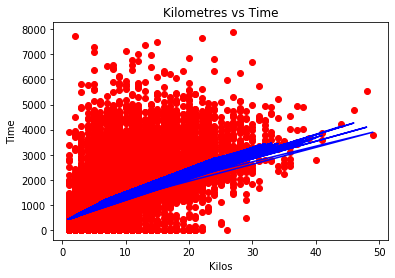

In [87]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color='blue')
plt.title('Kilometres vs Time')
plt.xlabel('Kilos')
plt.ylabel('Time')
plt.show()